In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint
from __future__ import print_function
import matplotlib
import os
%matplotlib inline  
tf.set_random_seed(777)

In [2]:
if"DISPLAY" not in os.environ:
    matplotlib.use('Agg')

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\programdata\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\programdata\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\programdata\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\programdata\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "c:\p

In [3]:
import matplotlib.pyplot as plt

In [4]:
def MinMaxScaler(data):
    numerator=data-np.min(data,0)
    denominator=np.max(data,0) -np.min(data,0)
    
    return numerator/(denominator +1e-7)

In [5]:
data_dim = 5
hidden_dim= 10
output_dim=1
seq_length= 7
learning_rate= 0.01
iterations =500

xy=np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy=xy[::-1]
xy=MinMaxScaler(xy)
x=xy
y=xy[:,[-1]]

dataX=[]
dataY=[]


In [6]:
for i in range(0, len(y)-seq_length):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
        
    print(_x,'->',_y)
    dataX.append(_x)
    dataY.append(_y)
    
train_size =int(len(dataY)*0.7)
test_size=len(dataY)- train_size

trainX,testX =np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY= np.array(dataY[0:train_size]),np.array(dataY[train_size:len(dataY)])

[[  2.13751054e-01   2.08179810e-01   1.91791832e-01   4.66075110e-04
    1.92092403e-01]
 [  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.16981885e-01]
 [  2.19142110e-01   2.63907214e-01   2.24686396e-01   4.56323384e-01
    2.24967473e-01]
 [  2.33129931e-01   2.36419163e-01   1.62682724e-01   5.70171193e-01
    1.47442742e-01]] -> [ 0.13289962]
[[  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.169818

 [ 0.06160452  0.05984329  0.0461873   0.28828538  0.05074084]] -> [ 0.05377184]
[[ 0.09602047  0.09256286  0.10258633  0.15624272  0.09941237]
 [ 0.09459257  0.10681264  0.10657706  0.17008156  0.11308129]
 [ 0.11397145  0.10990542  0.11165361  0.15063189  0.10311379]
 [ 0.08791917  0.09516437  0.09906505  0.09108183  0.102764  ]
 [ 0.08911395  0.08912336  0.08069577  0.15067671  0.06583772]
 [ 0.06160452  0.05984329  0.0461873   0.28828538  0.05074084]
 [ 0.04024406  0.06143311  0.05543067  0.1804607   0.05377184]] -> [ 0.07630073]
[[ 0.09459257  0.10681264  0.10657706  0.17008156  0.11308129]
 [ 0.11397145  0.10990542  0.11165361  0.15063189  0.10311379]
 [ 0.08791917  0.09516437  0.09906505  0.09108183  0.102764  ]
 [ 0.08911395  0.08912336  0.08069577  0.15067671  0.06583772]
 [ 0.06160452  0.05984329  0.0461873   0.28828538  0.05074084]
 [ 0.04024406  0.06143311  0.05543067  0.1804607   0.05377184]
 [ 0.04691738  0.06915044  0.0488283   0.21793493  0.07630073]] -> [ 0.1089136]
[[

 [ 0.27223762  0.27899516  0.28520232  0.08773864  0.2857633 ]] -> [ 0.27122]
[[ 0.28296159  0.2844869   0.28661069  0.18411759  0.28246982]
 [ 0.27995992  0.29966171  0.30235971  0.15158197  0.29782917]
 [ 0.28727451  0.29445885  0.30793499  0.10981447  0.30144301]
 [ 0.29665798  0.29922812  0.30579281  0.09206776  0.29377796]
 [ 0.27902749  0.2771453   0.29188389  0.08286278  0.28115842]
 [ 0.27223762  0.27899516  0.28520232  0.08773864  0.2857633 ]
 [ 0.27421911  0.27090191  0.28156952  0.12027427  0.27122   ]] -> [ 0.27649521]
[[ 0.27995992  0.29966171  0.30235971  0.15158197  0.29782917]
 [ 0.28727451  0.29445885  0.30793499  0.10981447  0.30144301]
 [ 0.29665798  0.29922812  0.30579281  0.09206776  0.29377796]
 [ 0.27902749  0.2771453   0.29188389  0.08286278  0.28115842]
 [ 0.27223762  0.27899516  0.28520232  0.08773864  0.2857633 ]
 [ 0.27421911  0.27090191  0.28156952  0.12027427  0.27122   ]
 [ 0.26780806  0.27032397  0.28299261  0.09039168  0.27649521]] -> [ 0.23038841]
[[ 0

 [ 0.48554281  0.48458222  0.45024443  0.27078964  0.44220327]] -> [ 0.38181575]
[[ 0.20535091  0.24482275  0.22723173  0.42667384  0.25442501]
 [ 0.4497866   0.51590851  0.46198194  1.          0.5257022 ]
 [ 0.47962707  0.49975687  0.48548633  0.52460339  0.49682007]
 [ 0.4678833   0.51166534  0.48927161  0.30198978  0.49472157]
 [ 0.48443543  0.52796729  0.50306322  0.35147441  0.49413864]
 [ 0.48554281  0.48458222  0.45024443  0.27078964  0.44220327]
 [ 0.44395838  0.43989643  0.39601719  0.32426279  0.38181575]] -> [ 0.39259926]
[[ 0.4497866   0.51590851  0.46198194  1.          0.5257022 ]
 [ 0.47962707  0.49975687  0.48548633  0.52460339  0.49682007]
 [ 0.4678833   0.51166534  0.48927161  0.30198978  0.49472157]
 [ 0.48443543  0.52796729  0.50306322  0.35147441  0.49413864]
 [ 0.48554281  0.48458222  0.45024443  0.27078964  0.44220327]
 [ 0.44395838  0.43989643  0.39601719  0.32426279  0.38181575]
 [ 0.36819148  0.39980647  0.39008969  0.23908757  0.39259926]] -> [ 0.39475592]
[

In [7]:

X=tf.placeholder(tf.float32,[None,seq_length,data_dim])
Y=tf.placeholder(tf.float32,[None,1])



In [8]:
cell=tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim,state_is_tuple= True,activation=tf.tanh )

In [9]:
outputs,_states=tf.nn.dynamic_rnn(cell,X, dtype=tf.float32)

In [10]:
Y_pred=tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn=None)

In [11]:
loss =tf.reduce_sum(tf.square(Y_pred-Y))

In [12]:
train=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [13]:
targets=tf.placeholder(tf.float32,[None,1])
predictions=tf.placeholder(tf.float32,[None,1])
rmse=tf.square(tf.reduce_mean(tf.square(targets-predictions)))

[step:0] loss:25.398422241210938
[step:1] loss:4.741678714752197
[step:2] loss:8.296273231506348
[step:3] loss:12.308565139770508
[step:4] loss:7.661688804626465
[step:5] loss:3.1149404048919678
[step:6] loss:2.236405611038208
[step:7] loss:3.7428994178771973
[step:8] loss:5.15886116027832
[step:9] loss:5.18191385269165
[step:10] loss:3.9376564025878906
[step:11] loss:2.312483549118042
[step:12] loss:1.2588951587677002
[step:13] loss:1.254879117012024
[step:14] loss:2.0110325813293457
[step:15] loss:2.70407772064209
[step:16] loss:2.7113757133483887
[step:17] loss:2.1003031730651855
[step:18] loss:1.3960527181625366
[step:19] loss:1.0561708211898804
[step:20] loss:1.1731470823287964
[step:21] loss:1.5222394466400146
[step:22] loss:1.79441237449646
[step:23] loss:1.8049077987670898
[step:24] loss:1.5672365427017212
[step:25] loss:1.240010380744934
[step:26] loss:1.0094523429870605
[step:27] loss:0.9757055640220642
[step:28] loss:1.1008440256118774
[step:29] loss:1.249470829963684
[step:

[step:251] loss:0.5484736561775208
[step:252] loss:0.5477892160415649
[step:253] loss:0.5471111536026001
[step:254] loss:0.5464391708374023
[step:255] loss:0.5457733869552612
[step:256] loss:0.545113205909729
[step:257] loss:0.5444585084915161
[step:258] loss:0.5438091158866882
[step:259] loss:0.5431647896766663
[step:260] loss:0.5425254702568054
[step:261] loss:0.5418906211853027
[step:262] loss:0.5412603616714478
[step:263] loss:0.5406340956687927
[step:264] loss:0.5400120615959167
[step:265] loss:0.5393937230110168
[step:266] loss:0.5387789011001587
[step:267] loss:0.5381675958633423
[step:268] loss:0.5375596880912781
[step:269] loss:0.5369545221328735
[step:270] loss:0.5363524556159973
[step:271] loss:0.535753071308136
[step:272] loss:0.5351560711860657
[step:273] loss:0.5345615148544312
[step:274] loss:0.5339694619178772
[step:275] loss:0.5333792567253113
[step:276] loss:0.532791018486023
[step:277] loss:0.5322045087814331
[step:278] loss:0.531619668006897
[step:279] loss:0.531036

[step:495] loss:0.42582327127456665
[step:496] loss:0.42561787366867065
[step:497] loss:0.42541444301605225
[step:498] loss:0.4252135753631592
[step:499] loss:0.42501509189605713
RMSE: 6.429270342778182e-07


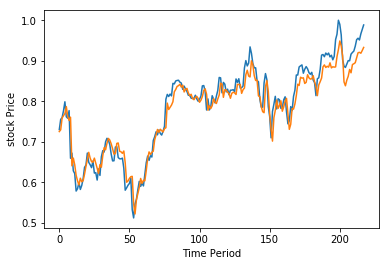

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iterations):
        _, step_loss =sess.run([train,loss], feed_dict={X:trainX, Y:trainY})
        print("[step:{}] loss:{}".format(i,step_loss))
    test_predict=sess.run(Y_pred,feed_dict={X:testX})
    rmse_val=sess.run(rmse,feed_dict={targets:testY, predictions:test_predict})
    print("RMSE: {}".format(rmse_val))
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("stock Price")
    plt.show()
